<a href="https://colab.research.google.com/github/G100A008/-/blob/master/G100A008_%E6%9C%9F%E4%B8%AD%E5%A0%B1%E5%91%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Commented out IPython magic to ensure Python compatibility.
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set formattign options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
# %matplotlib inline

In [3]:
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 11.5 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [4]:
# import data reader package
import pandas_datareader as pdr

# read data from Yahoo! Finance for a specific 
# stock specified by ticker and between the start and end dates
def get_stock_data(ticker, start, end):
    # read the data
    data = pdr.data.DataReader(ticker, 'yahoo', start, end)

    # rename this column
    data.insert(0, "Ticker", ticker)
    return data

# request the three years of data for MSFT
start = datetime(2022, 1, 1)
end = datetime(2022, 12, 31)
get_stock_data("MSFT", start, end)[:5]

# gets data for multiple stocks
# tickers: a list of stock symbols to fetch
# start and end are the start end end dates
def get_data_for_multiple_stocks(tickers, start, end):
    # we return a dictionary
    stocks = dict()
    # loop through all the tickers
    for ticker in tickers:
        # get the data for the specific ticker
        s = get_stock_data(ticker, start, end)
        # add it to the dictionary
        stocks[ticker] = s
    # return the dictionary
    return stocks

# get the data for all the stocks that we want
raw = get_data_for_multiple_stocks(
    ["MSFT", "AAPL", "GE", "IBM", "AA", "DAL", "UAL", "PEP", "KO"],
    start, end)

# take a peek at the data for MSFT
raw['MSFT'][:5]

Ticker        High         Low        Open  \
Date                                                    
2022-01-03   MSFT  338.000000  329.779999  335.350006   
2022-01-04   MSFT  335.200012  326.119995  334.829987   
2022-01-05   MSFT  326.070007  315.980011  325.859985   
2022-01-06   MSFT  318.700012  311.489990  313.149994   
2022-01-07   MSFT  316.500000  310.089996  314.149994   

                 Close      Volume   Adj Close  
Date                                            
2022-01-03  334.750000  28865100.0  334.059265  
2022-01-04  329.010010  32674300.0  328.331116  
2022-01-05  316.380005  40054300.0  315.727173  
2022-01-06  313.880005  39646100.0  313.232330  
2022-01-07  314.040009  32720000.0  313.391998

In [5]:
# given the dictionary of data frames,
# pivots a given column into values with column
# names being the stock symbols
def pivot_tickers_to_columns(raw, column):
    items = []
    # loop through all dictionary keys
    for key in raw:
        # get the data for the key
        data = raw[key]
        # extract just the column specified
        subset = data[["Ticker", column]]
        # add to items
        items.append(subset)
    
    # concatenate all the items
    combined = pd.concat(items)
    # reset the index
    ri = combined.reset_index()
    # return the pivot
    return ri.pivot("Date", "Ticker", column)

# do the pivot
close_px = pivot_tickers_to_columns(raw, "Close")
# peek at the result
close_px[:5]

Ticker             AA        AAPL        DAL  ...  \
Date                                          ...   
2022-01-03  60.360001  182.009995  40.290001  ...   
2022-01-04  57.529999  179.699997  40.590000  ...   
2022-01-05  58.549999  174.919998  40.279999  ...   
2022-01-06  58.450001  172.000000  40.110001  ...   
2022-01-07  62.369999  172.169998  41.509998  ...   

Ticker            MSFT         PEP        UAL  
Date                                           
2022-01-03  334.750000  172.979996  45.490002  
2022-01-04  329.010010  173.229996  46.250000  
2022-01-05  316.380005  173.820007  45.779999  
2022-01-06  313.880005  173.860001  45.770000  
2022-01-07  314.040009  174.080002  47.310001  

[5 rows x 9 columns]

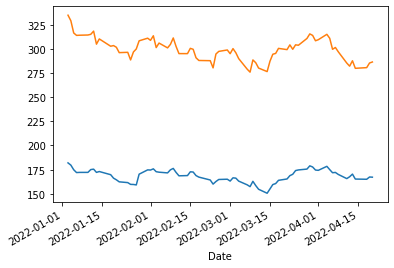

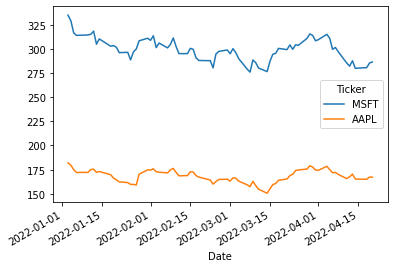

In [6]:
#Plotting time-series prices
# plot the closing prices of AAPL
close_px['AAPL'].plot();

# plot the closing prices of MSFT
close_px['MSFT'].plot();

# plot MSFT vs AAPL on the same chart
close_px[['MSFT', 'AAPL']].plot();

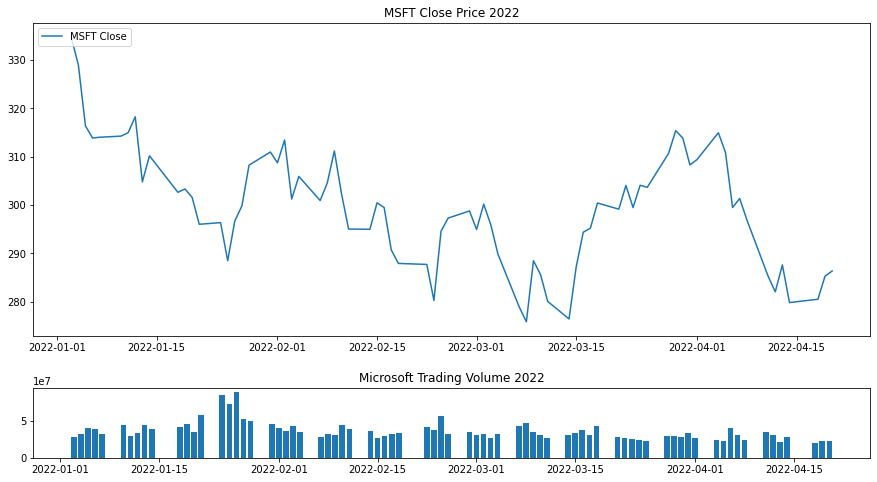

In [7]:
# pivot the volume data into columns
volumes = pivot_tickers_to_columns(raw, "Volume")
volumes.tail()

# plot the volume for MSFT
msft_volume = volumes[["MSFT"]]
plt.bar(msft_volume.index, msft_volume["MSFT"])
plt.gcf().set_size_inches(15,8)

# draw the price history on the top
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(close_px['MSFT'].index, close_px['MSFT'], 
         label='MSFT Close')
plt.title('MSFT Close Price 2022')
plt.legend(loc=2)

# and the volume along the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(msft_volume.index, msft_volume['MSFT'])
plt.title('Microsoft Trading Volume 2022')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

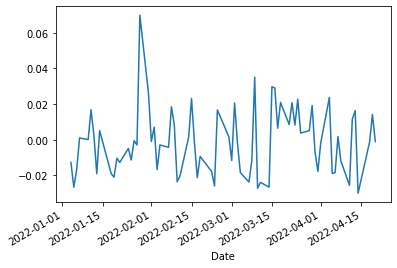

In [8]:
# calculate daily percentage change
daily_pc = close_px / close_px.shift(1) - 1
daily_pc[:5]

# check the percentage on 2022-01-05
close_px.loc['2022-01-05']['AAPL'] / \
    close_px.loc['2022-01-04']['AAPL'] -1

# plot daily percentage change for AAPL
daily_pc["AAPL"].plot();

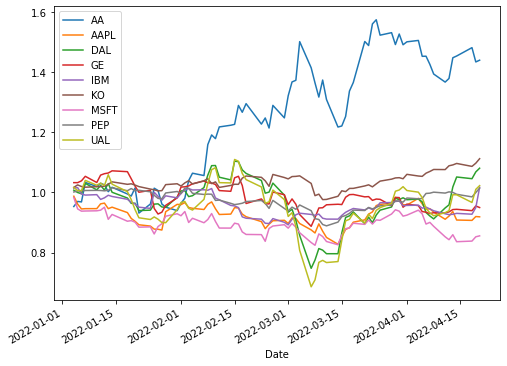

In [9]:
# calculate daily cumulative return
daily_cr = (1 + daily_pc).cumprod()
daily_cr[:5]

# plot all the cumulative returns to get an idea 
# of the relative performance of all the stocks
daily_cr.plot(figsize=(8,6))
plt.legend(loc=2);

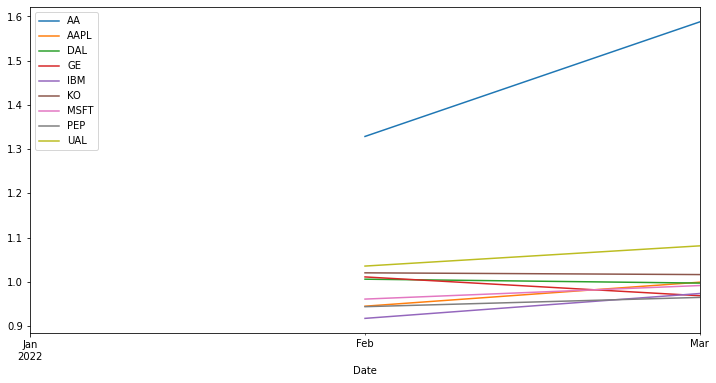

In [10]:
# resample to end of month and forward fill values
monthly = close_px.asfreq('M').ffill()
monthly[:5]

# calculate the monthly percentage changes
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:5]

# calculate monthly cumulative return
monthly_cr = (1 + monthly_pc).cumprod()
monthly_cr[:5]

# plot the monthly cumulative returns
monthly_cr.plot(figsize=(12,6))
plt.legend(loc=2);

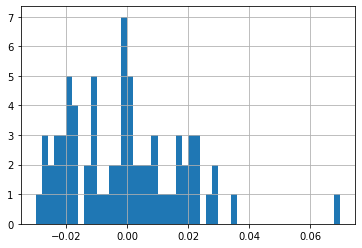

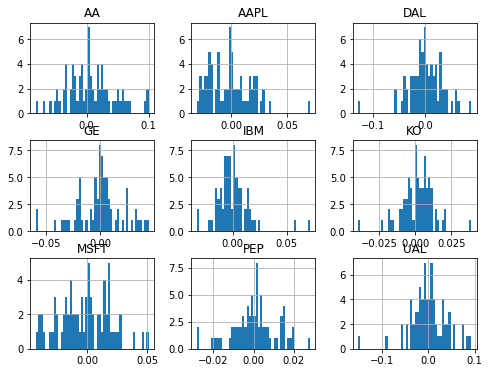

In [11]:
# histogram of the daily percentage change for AAPL
aapl = daily_pc['AAPL']
aapl.hist(bins=50);

# matrix of all stocks daily % changes histograms
daily_pc.hist(bins=50, figsize=(8,6));


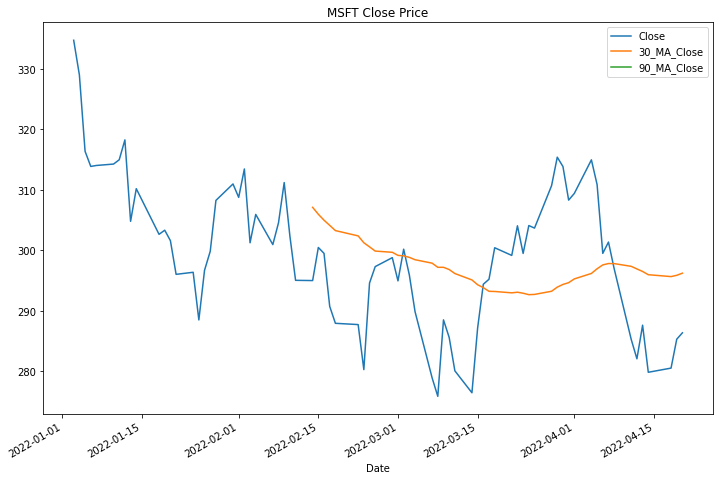

In [12]:
# extract just MSFT close
msft_close = close_px[['MSFT']]['MSFT']
# calculate the 30 and 90 day rolling means
ma_30 = msft_close.rolling(window=30).mean()
ma_90 = msft_close.rolling(window=90).mean()
# compose into a DataFrame that can be plotted
result = pd.DataFrame({'Close': msft_close, 
                       '30_MA_Close': ma_30,
                       '90_MA_Close': ma_90})
# plot all the series against each other
result.plot(title="MSFT Close Price")
plt.gcf().set_size_inches(12,8)

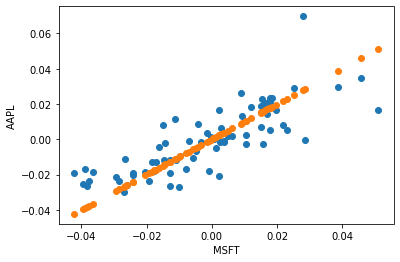

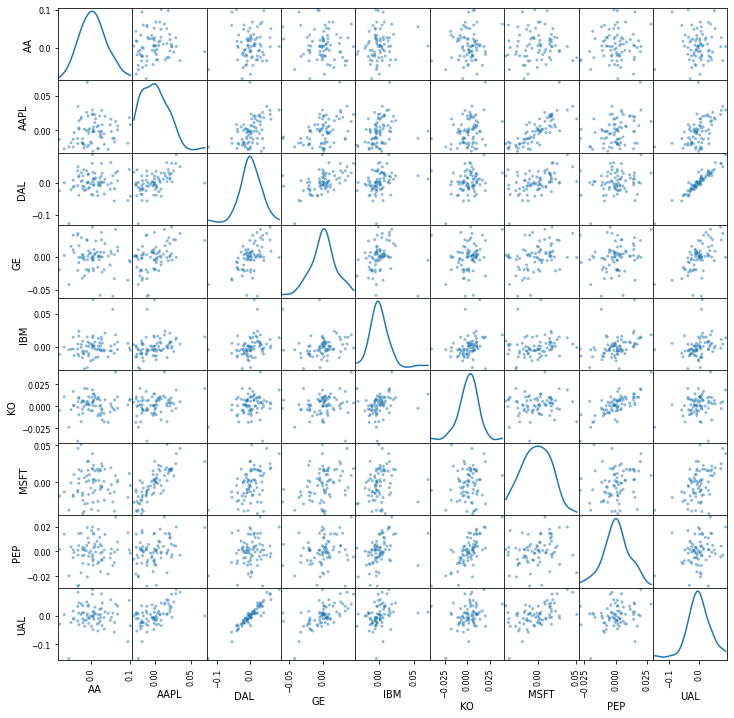

In [13]:
# plot the daily percentage change of MSFT vs AAPL
plt.scatter(daily_pc['MSFT'], daily_pc['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL');

# demonstrate perfect correlation
plt.scatter(daily_pc['MSFT'], daily_pc['MSFT']);

from pandas.plotting import scatter_matrix
# plot the scatter of daily price changed for ALL stocks
scatter_matrix(daily_pc, diagonal='kde', figsize=(12,12));

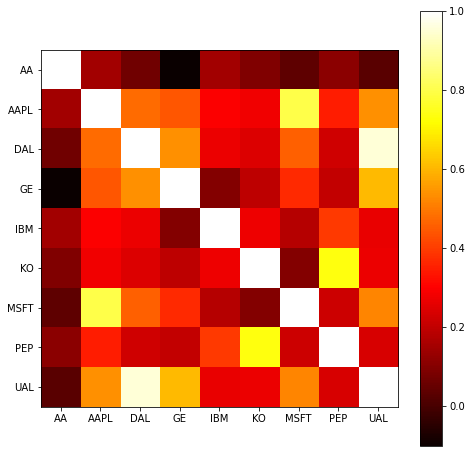

In [14]:
# calculate the correlation between all the stocks relative
# to daily percentage change
corrs = daily_pc.corr()
corrs

# plot a heatmap of the correlations
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(8,8)


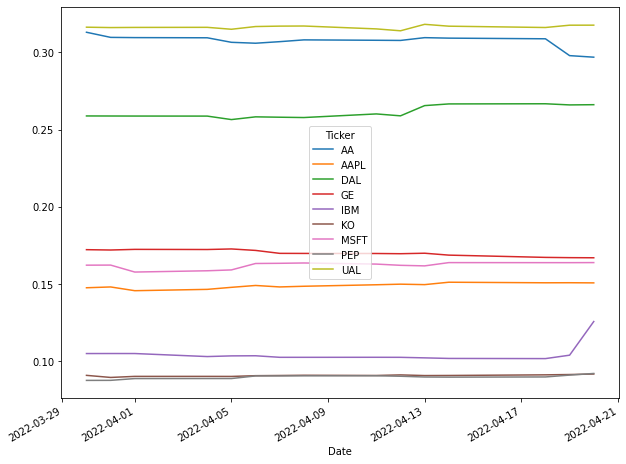

In [15]:
# 60 period minimum
min_periods = 60
# calculate the volatility
vol = daily_pc.rolling(window=min_periods).std() * \
        np.sqrt(min_periods)
# plot it
vol.plot(figsize=(10, 8));

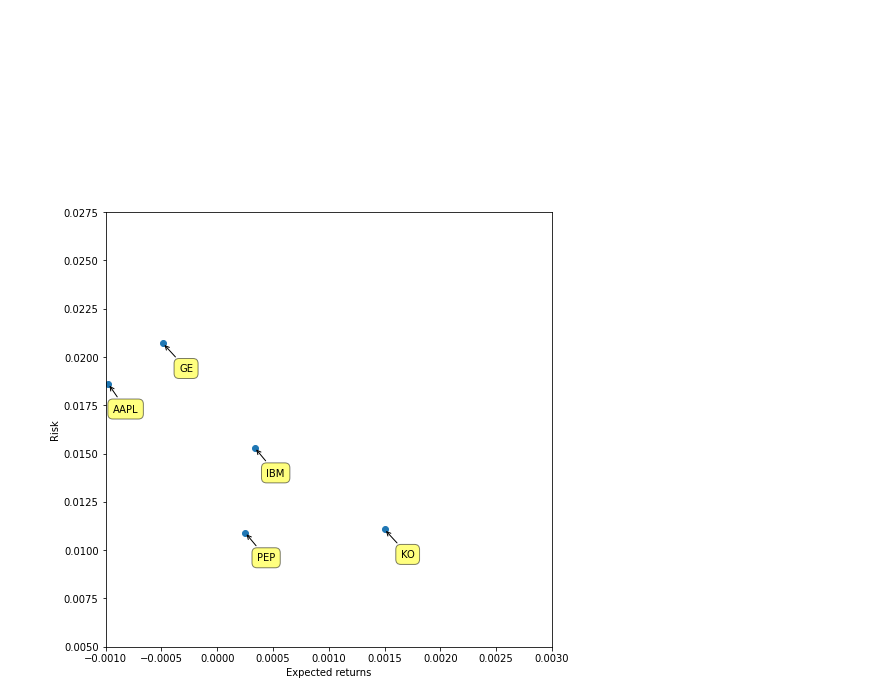

In [16]:
# generate a scatter of the mean vs std of daily % change
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# this adds fancy labels to each dot, with an arrow too
for label, x, y in zip(daily_pc.columns, 
                       daily_pc.mean(), 
                       daily_pc.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', 
        va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', 
                    fc = 'yellow', 
                    alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', 
                          connectionstyle = 'arc3,rad=0'))

# set ranges and scales for good presentation
plt.xlim(-0.001, 0.003)
plt.ylim(0.005, 0.0275)

# set size
plt.gcf().set_size_inches(8,8)